## SVM IMPLEMENTATION

### ProblemStatement:-To find out based on given features whether the loan will get approved or not

In [3]:
## Supervised learning with classification task(2 classes)

In [1]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Domian analysis.

In [8]:
data.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [7]:
## Renaming the target column
data.rename(columns = {'Loan_Status (Approved)':'Loan_Status'}, inplace = True)

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


 # Basic checks

In [12]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# EDA

In [18]:
# Univariate analysis
!pip install sweetviz


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
## Bivariate analysis

In [21]:
data1=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]
data2=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
            'Credit_History']]

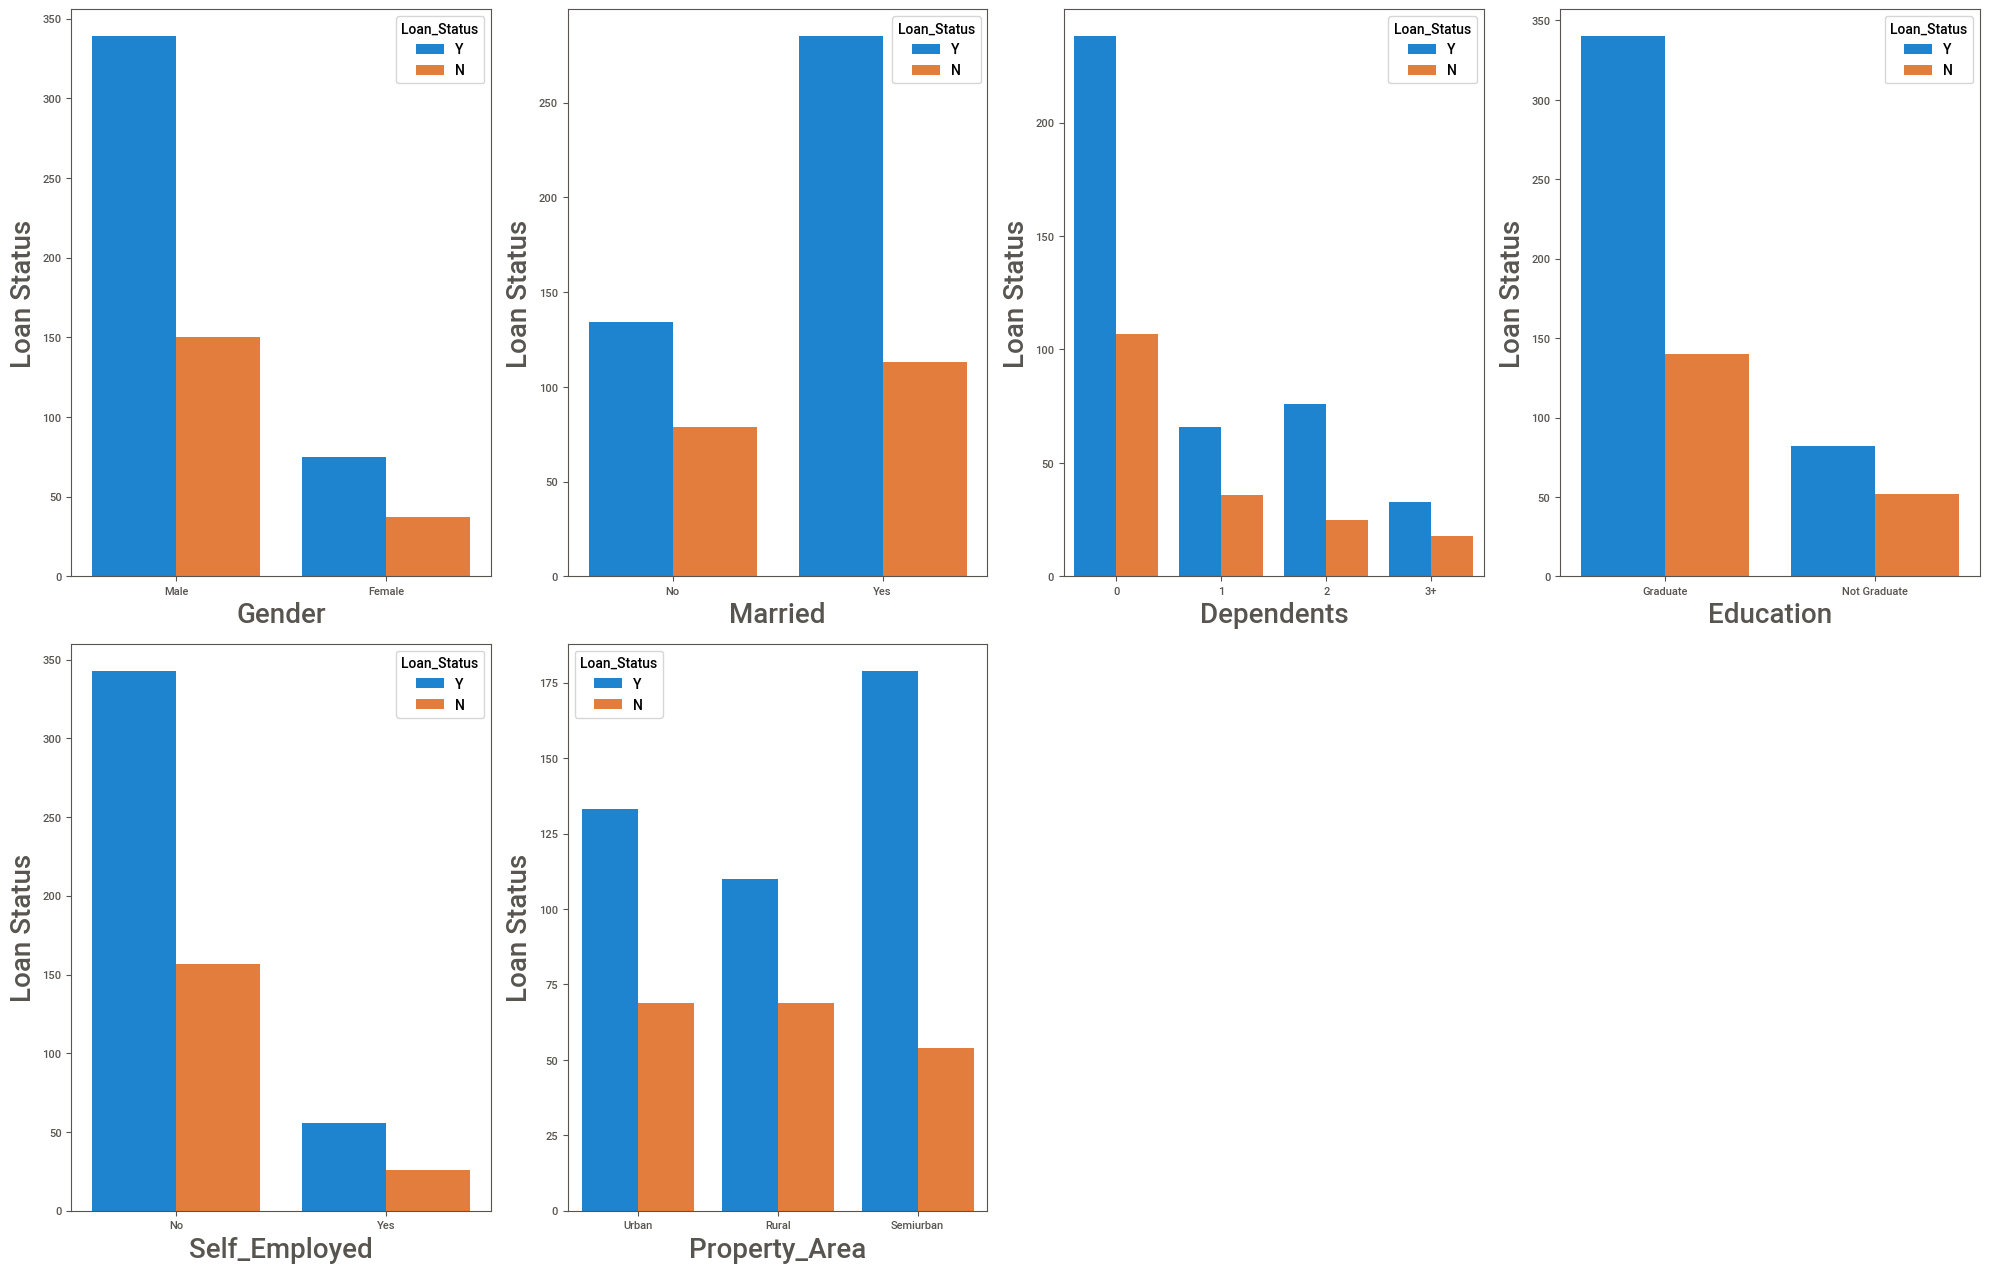

In [22]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data1:#accessing the columns
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data1[column],hue=data['Loan_Status'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

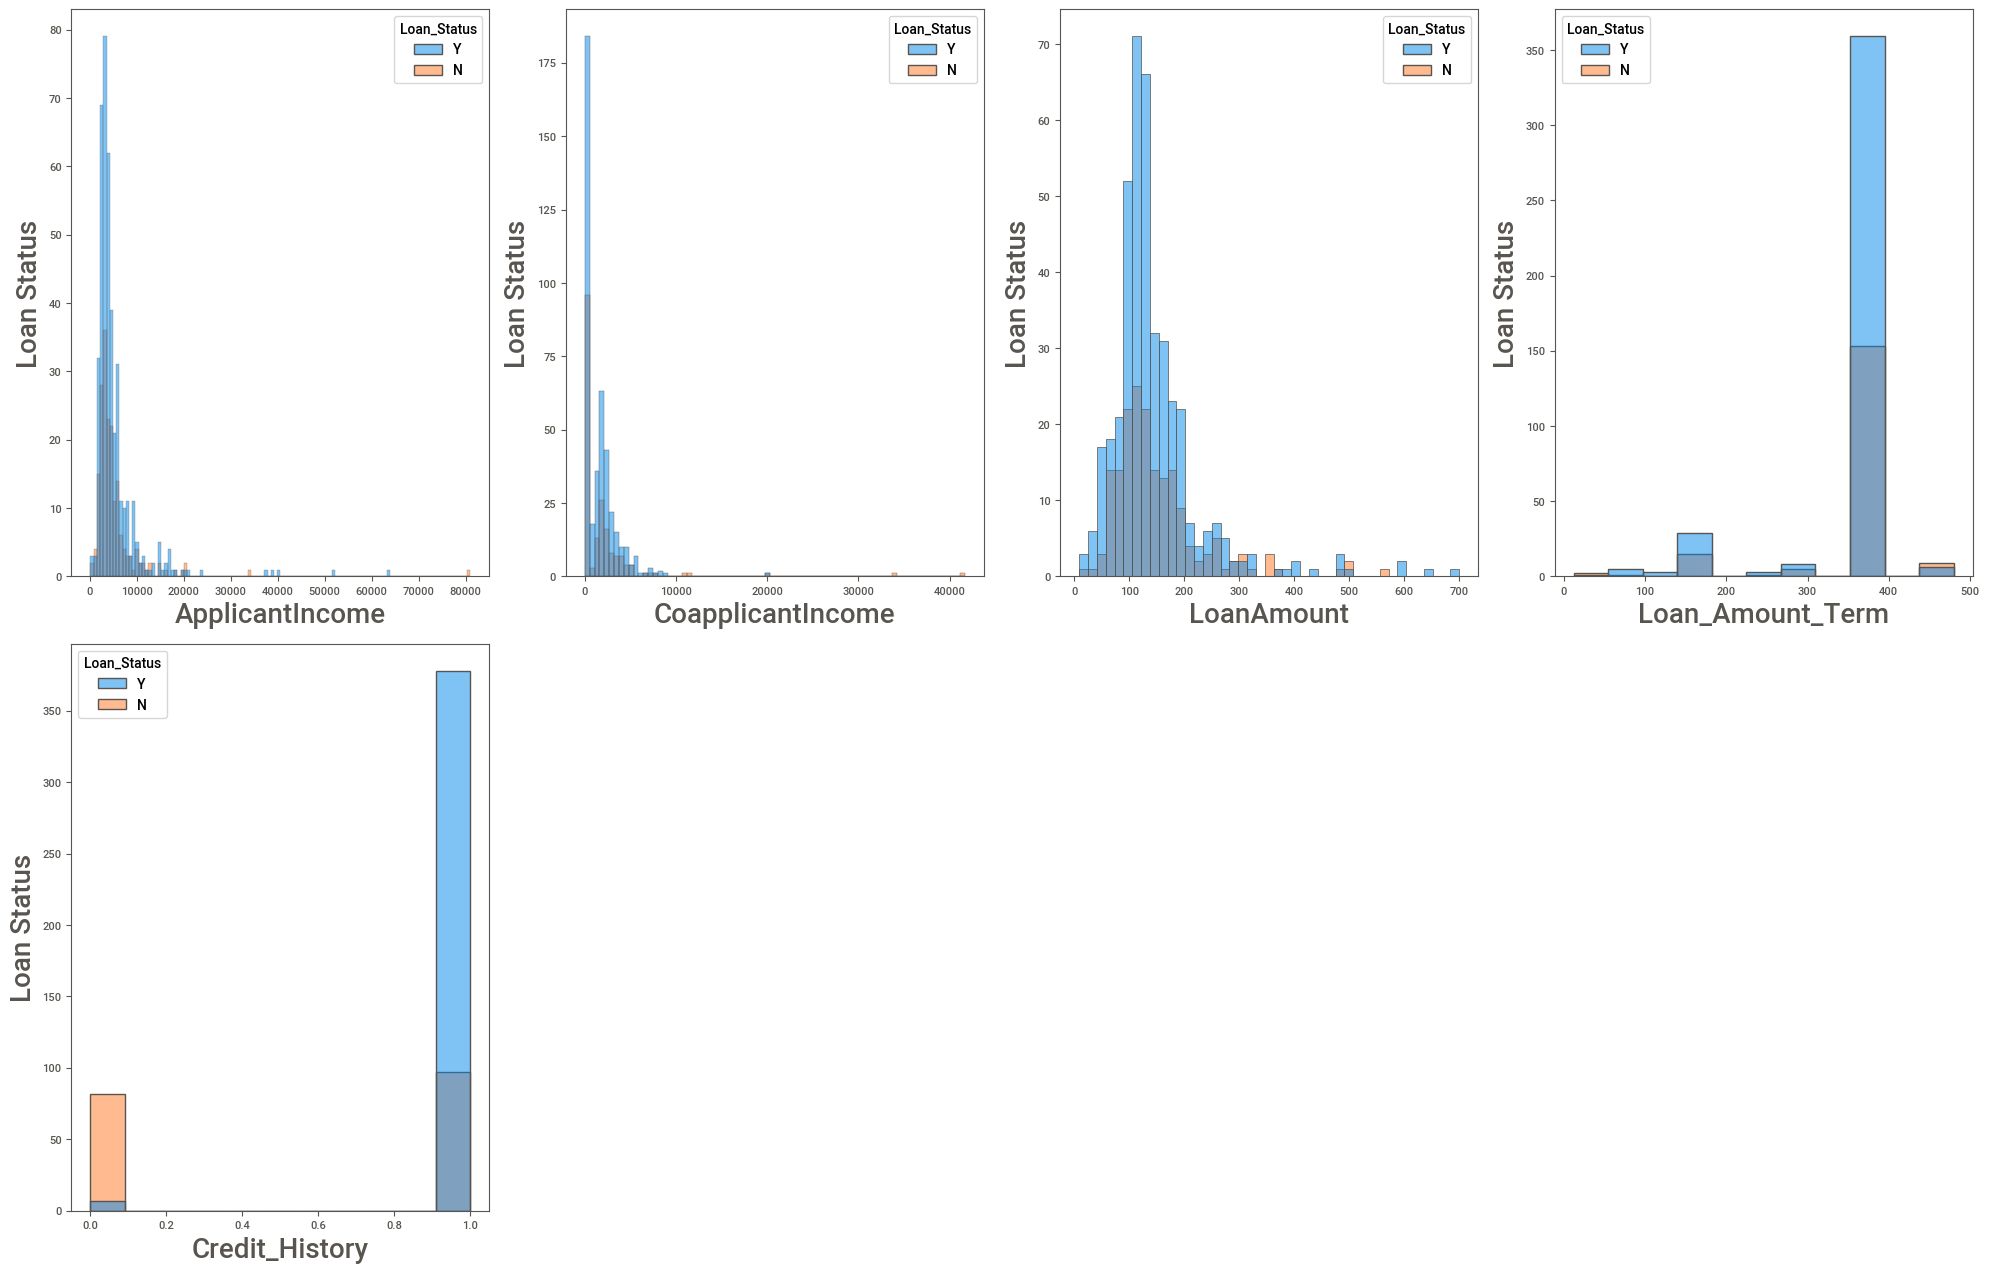

In [23]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data2:#accessing the columns
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[column],hue=data['Loan_Status'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

## Data Preprocessing

In [25]:
# Step 1 Dealing with null values
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
## Gender
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [27]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [28]:
# Imputation here used is mode imputation
data.loc[data['Gender'].isnull()==True, 'Gender']='Male'


In [29]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
## Dependent
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [31]:
data.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [32]:
data.loc[data['Dependents'].isnull()==True, 'Dependents']='0'

In [33]:
data.Dependents.isnull().sum()

0

In [34]:
#pd.crosstab(data.Dependents,data.Loan_Status)

In [35]:
## For married feature
data.loc[data['Married'].isnull()==True]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,0,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [36]:
## getting the counts
data.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [37]:
## Imputing with yes i.e mode
data.loc[data['Married'].isnull()==True,'Married']='Yes'

In [38]:
## Checking Self_Employed
data.loc[data['Self_Employed'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [39]:
data.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [40]:
# Replace the nan values with mode
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

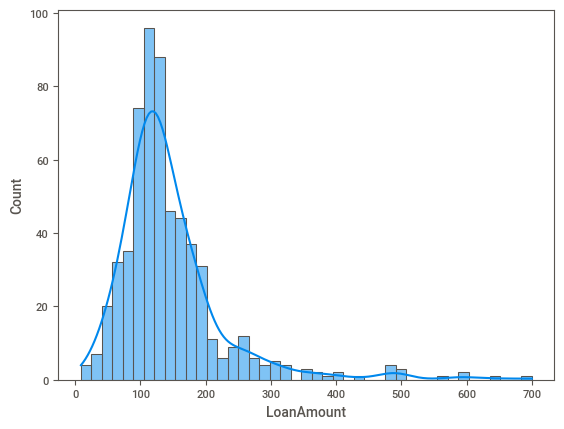

In [41]:
## For continuous data
## Histogram since it has numerical value
sns.histplot(x = 'LoanAmount', data = data, kde = True)
plt.show()

In [42]:
# Check median for LoanAmount column
np.median(data.LoanAmount.dropna(axis=0))

128.0

In [43]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=128

In [44]:
data.LoanAmount.isnull().sum()

0

In [45]:
## Laon amount term
data.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [46]:
np.median(data.Loan_Amount_Term.dropna(axis=0))

360.0

In [47]:
data.loc[data['Loan_Amount_Term'].isnull()==True, 'Loan_Amount_Term']=360

In [48]:
# replace the nan values in Loan_Amount_Term with the median value
#data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data.Loan_Amount_Term.dropna(axis=0))

In [49]:
# Credit_History
data.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [50]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=1.0

In [51]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Step 2 Handling Categorical data


In [53]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
## One hot encoding
pd.get_dummies(data['Gender'],prefix='Gender',dtype = int)

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [55]:
pd.get_dummies(data['Gender'],prefix='Gender',dtype = int,drop_first=True)

,Gender_Male
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [56]:
df1=pd.get_dummies(data['Gender'],prefix='Gender',dtype = int,drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Gender'],axis=1)

In [57]:
data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [58]:
df1=pd.get_dummies(data['Married'],prefix='Married',dtype = int,drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Married'],axis=1)

In [59]:
df1=pd.get_dummies(data['Education'],prefix='Education',dtype = int,drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Education'],axis=1)

In [60]:
df1=pd.get_dummies(data['Property_Area'],prefix='Property_Area',dtype = int,drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Property_Area'],axis=1)


In [61]:
df1=pd.get_dummies(data['Dependents'],prefix='Dependents',dtype = int,drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Dependents'],axis=1)

In [62]:
df1=pd.get_dummies(data['Self_Employed'],prefix='Self_Employed',dtype = int,drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Self_Employed'],axis=1)

In [63]:
df1=pd.get_dummies(data['Loan_Status'],prefix='Loan_Status',dtype = int,drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Loan_Status'],axis=1)

In [64]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Loan_Status_Y
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,0,0,1,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,1,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,0,0,0,1,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,0,0,0,1


In [65]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = 
scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])

In [66]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Loan_Status_Y
0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,1,0,0,0,1,0,0,0,0,1
1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0,0
2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,1,1,0,0,1,0,0,0,1,1
3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,0,1,0,0,0,0,1
4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,1,0,0,0,1,0,0,0,0,1


In [67]:
## checking the duplicate rows

#data.duplicate()
data.duplicated().sum()

0

In [68]:
## Saving the preprocessed data.
data.to_csv('Preprocessed_data.csv')

In [69]:
## Loading the data
preprcessed_data=pd.read_csv('Preprocessed_data.csv')

In [70]:
preprcessed_data.head()

,Unnamed: 0,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Loan_Status_Y
0,0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,1,0,0,0,1,0,0,0,0,1
1,1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0,0
2,2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,1,1,0,0,1,0,0,0,1,1
3,3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,0,1,0,0,0,0,1
4,4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,1,0,0,0,1,0,0,0,0,1


## Feature Selection

In [72]:
# Removing redundant columns
#We can drop loan id.
l1=['Unnamed: 0','Loan_ID']
preprcessed_data.drop(l1,axis=1,inplace=True)

In [73]:
preprcessed_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Loan_Status_Y
0,0.070489,0.000000,0.172214,360.0,1.0,1,0,0,0,1,0,0,0,0,1
1,0.054830,0.036192,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,0,0,1,0,0,0,1,1
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,0,1,0,0,0,0,1
4,0.072356,0.000000,0.191027,360.0,1.0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,0.048930,0.000000,0.044863,180.0,1.0,1,1,0,0,0,0,0,1,0,1
611,0.097984,0.005760,0.353111,360.0,1.0,1,1,0,0,1,1,0,0,0,1
612,0.091936,0.000000,0.257598,360.0,1.0,1,1,0,0,1,0,1,0,0,1


In [74]:
preprcessed_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Loan_Status_Y
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.058809,0.051708,-0.140760,-0.014246,-0.000598,0.040861,-0.034650,0.156687,0.127180,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.082912,0.075948,-0.062290,-0.027044,0.022776,-0.029769,0.010016,0.041491,-0.016100,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,0.106904,0.146546,-0.168759,-0.005804,-0.036050,0.061976,0.020126,0.152850,0.115100,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.074030,-0.100912,-0.073928,0.059141,-0.094279,-0.088492,-0.010609,-0.077273,-0.033739,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.009170,0.010938,-0.073658,0.035976,-0.016934,0.009757,0.007987,-0.060473,-0.001550,0.540556
Gender_Male,0.058809,0.082912,0.106904,-0.074030,0.009170,1.000000,0.364569,0.045364,-0.108623,0.034530,-0.004466,0.129953,0.096319,-0.000525,0.017987
Married_Yes,0.051708,0.075948,0.146546,-0.100912,0.010938,0.364569,1.000000,0.012304,0.005845,0.000546,0.113853,0.249547,0.132566,0.004489,0.091478
Education_Not Graduate,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,0.045364,0.012304,1.000000,-0.039410,-0.034279,-0.013355,0.020822,0.055288,-0.010383,-0.085884
Property_Area_Semiurban,-0.014246,-0.027044,-0.005804,0.059141,0.035976,-0.108623,0.005845,-0.039410,1.000000,-0.547574,0.011661,-0.012017,0.007863,0.008710,0.136540
Property_Area_Urban,-0.000598,0.022776,-0.036050,-0.094279,-0.016934,0.034530,0.000546,-0.034279,-0.547574,1.000000,0.069320,0.016569,-0.047460,-0.030338,-0.043621


<Axes: >

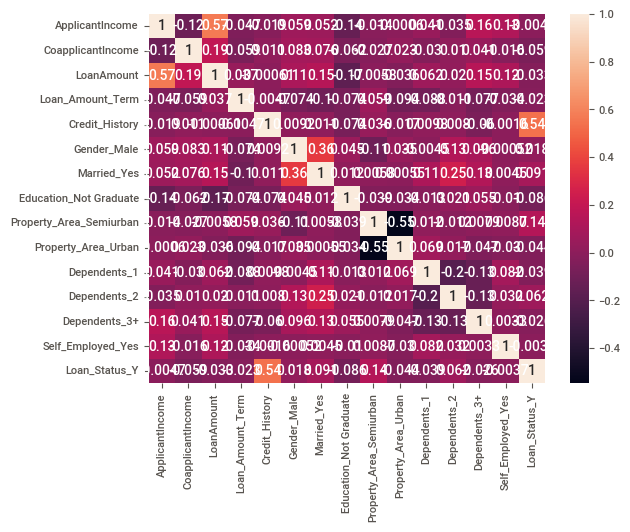

In [75]:
sns.heatmap(preprcessed_data.corr(),annot=True)

## Model Creation

In [77]:
preprcessed_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_Yes', 'Loan_Status_Y'],
      dtype='object')

In [78]:
## defining X and y
X=preprcessed_data.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_Yes']]
y=preprcessed_data.Loan_Status_Y

In [79]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [80]:
import sklearn as sk
sk.__version__

'1.3.2'

## balancing the data

In [82]:
data.Loan_Status_Y.value_counts()

Loan_Status_Y
1    422
0    192
Name: count, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [85]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_smote))

Counter({1: 301, 0: 159})
Counter({1: 301, 0: 301})


In [86]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [87]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)


In [88]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7857142857142857

In [89]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.8782287822878228

In [90]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=4,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())


[0.81538462 0.81538462 0.81395349 0.81395349]
Cross validation Score: 0.8146690518783543


# Hyper parameter tunning

# GridSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=1

[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=

[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=6

[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=

[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=7

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [94]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 70, 'gamma': 0.01, 'random_state': 1}


In [95]:
clf=SVC(C=70, gamma=0.01,random_state=1) ##0.1

In [96]:
clf.fit(X_smote, y_smote)

SVC(C=70, gamma=0.01, random_state=1)

In [97]:
y_clf=clf.predict(X_test)

In [98]:
f1=f1_score(y_test,y_clf)
f1

0.776255707762557